In [67]:
# Loading the imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [27]:
# Loading the data.
df = pd.read_csv('apartments.csv')
df.tail()

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
2515,2515,3 Bedroom Apartment / Flat to rent in Kilimani,"Kilimani, Nairobi",3,3,75 000,Per Month
2516,2516,3 Bedroom Apartment / Flat to rent in Nyali,NaN,3,2,45 000,Per Month
2517,2517,2 Bedroom Apartment / Flat to rent in Spring V...,"Grevillea Grove Spring Valley, Spring Valley, ...",2,3,65 000,Per Month
2518,2518,4 Bedroom Apartment / Flat to rent in Muthaiga,"Muthaiga, Nairobi",4,5,300 000,Per Month
2519,2519,2 Bedroom Apartment / Flat to rent in Westlands,"Westlands, Nairobi",2,2,100 000,Per Month


## Data Cleaning

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2520 non-null   int64 
 1   title       2520 non-null   object
 2   location    2144 non-null   object
 3   bedrooms    2520 non-null   int64 
 4   bathrooms   2520 non-null   int64 
 5   price       2520 non-null   object
 6   rate        2520 non-null   object
dtypes: int64(3), object(4)
memory usage: 137.9+ KB


In [29]:
df.describe()

,Unnamed: 0,bedrooms,bathrooms
count,2520.000000,2520.000000,2520.000000
mean,1259.500000,2.551190,2.450794
std,727.605662,0.922868,0.976480
min,0.000000,1.000000,1.000000
25%,629.750000,2.000000,2.000000
50%,1259.500000,3.000000,2.000000
75%,1889.250000,3.000000,3.000000
max,2519.000000,4.000000,5.000000


In [30]:
df.shape

(2520, 7)

### Removing the unecessary columns

In [31]:
df.head()

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month
2,2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month
3,3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month
4,4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110 000,Per Month


In [32]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
# Ceaning the price column to remove the spaces and special characters
def clean_price_column(df, column_name='price'):
    """
    Cleans the 'price' column by removing spaces and converting the values to integers.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the price column.
    column_name (str): The name of the column to clean. Defaults to 'price'.
    
    Returns:
    pd.DataFrame: The DataFrame with the cleaned price column.
    """
    # Ensure the column exists
    if column_name in df.columns:
        df[column_name] = df[column_name].str.replace(' ', '').astype(int)
    else:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    
    return df

# Call the function to clean the 'price' column in the DataFrame
df = clean_price_column(df, 'price')

In [34]:
# Check for missing values
df.isnull().sum()

title          0
location     376
bedrooms       0
bathrooms      0
price          0
rate           0
dtype: int64

In [35]:
df.head(10)

,title,location,bedrooms,bathrooms,price,rate
0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200000,Per Month
1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70000,Per Month
2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38000,Per Month
3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80000,Per Month
4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110000,Per Month
5,4 Bedroom Apartment / Flat to rent in Kahawa W...,"Thika Rd Nairobi, Kahawa Wendani, Nairobi",4,2,57750,Per Month
6,2 Bedroom Apartment / Flat to rent in Kilimani,"Kilimani, Nairobi",2,3,65000,Per Month
7,3 Bedroom Apartment / Flat to rent in Westlands,NaN,3,3,78000,Per Month
8,1 Bedroom Apartment / Flat to rent in Nyali,"Nyali, Mombasa",1,1,5000,Per Day
9,4 Bedroom Apartment / Flat to rent in Muthaiga,"Muthaiga, Nairobi",4,5,300000,Per Month


In [36]:
# Cleaning the missing values in the location column
def fill_location_from_title(row):
    """
    Fills missing 'location' values using the last word in the 'title' column.
    """
    return row['title'].split()[-1] if pd.isnull(row['location']) else row['location']

# Apply the function to fill missing locations
df['location'] = df.apply(fill_location_from_title, axis=1)


In [37]:
#Check the data types
print(df.dtypes)

title        object
location     object
bedrooms      int64
bathrooms     int64
price         int64
rate         object
dtype: object


In [38]:
# Check for unique values in the rate column
df.rate.unique()

array(['Per Month', 'Per Day'], dtype=object)

In [39]:
# Function to convert price to monthly price based on the rate
def convert_to_monthly_price(row):
    if 'Per Month' in row['rate']:
        return row['price']  # Already in monthly price
    elif 'Per Day' in row['rate']:
        return row['price'] * 30  # Convert daily to monthly
    else:
        return row['price']  # Handle unexpected values gracefully

# Apply the function to create a new column
df['monthly_price'] = df.apply(convert_to_monthly_price, axis=1)

## Exploratory Data Analysis

/home/troye/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


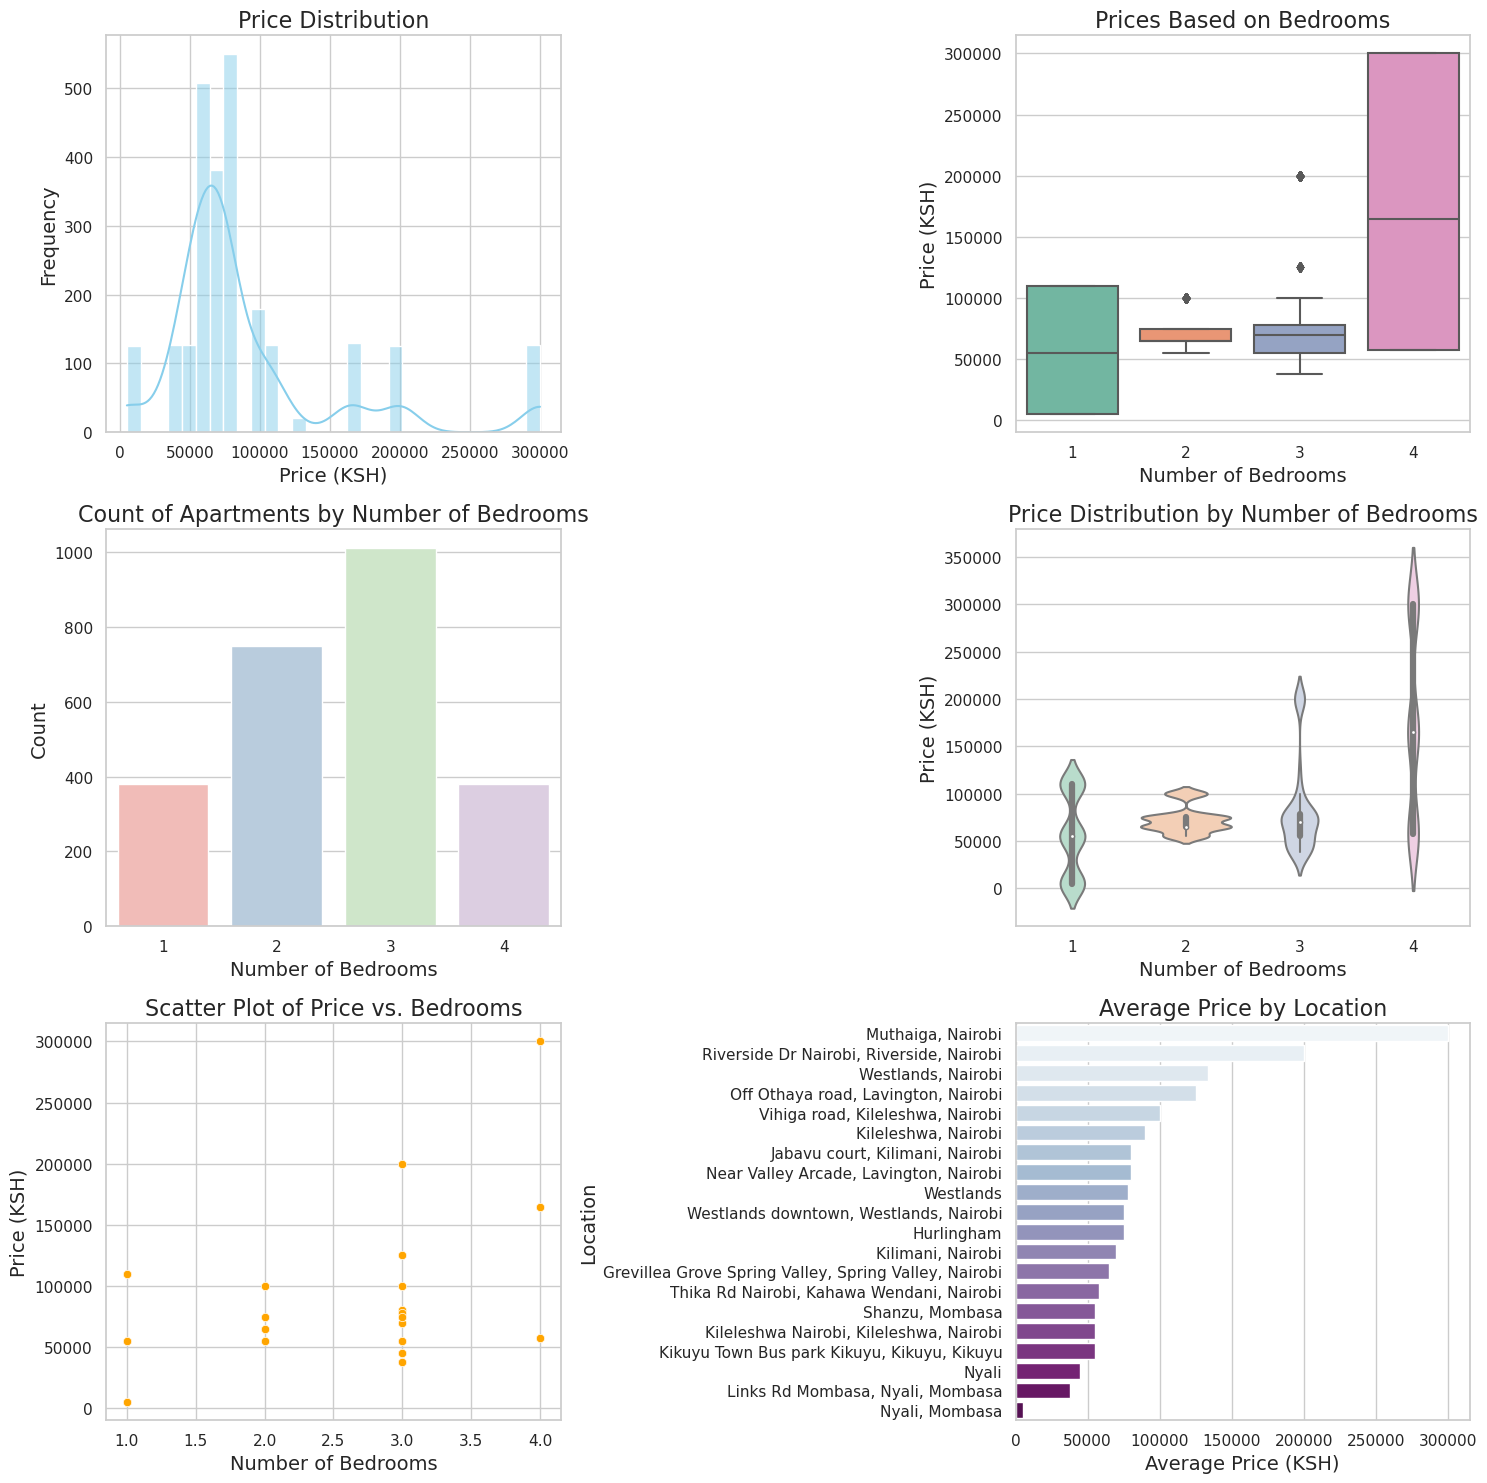

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# 1. Plot distribution of prices
sns.histplot(df['price'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price Distribution', fontsize=16)
axes[0, 0].set_xlabel('Price (KSH)', fontsize=14)
axes[0, 0].set_ylabel('Frequency', fontsize=14)

# 2. Box Plot for Prices by Bedrooms
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Prices Based on Bedrooms', fontsize=16)
axes[0, 1].set_xlabel('Number of Bedrooms', fontsize=14)
axes[0, 1].set_ylabel('Price (KSH)', fontsize=14)

# 3. Count Plot for Number of Bedrooms
sns.countplot(x='bedrooms', data=df, ax=axes[1, 0], palette='Pastel1')
axes[1, 0].set_title('Count of Apartments by Number of Bedrooms', fontsize=16)
axes[1, 0].set_xlabel('Number of Bedrooms', fontsize=14)
axes[1, 0].set_ylabel('Count', fontsize=14)

# 4. Violin Plot for Price Based on Bedrooms
sns.violinplot(x='bedrooms', y='price', data=df, ax=axes[1, 1], palette='Pastel2')
axes[1, 1].set_title('Price Distribution by Number of Bedrooms', fontsize=16)
axes[1, 1].set_xlabel('Number of Bedrooms', fontsize=14)
axes[1, 1].set_ylabel('Price (KSH)', fontsize=14)

# 5. Scatter Plot of Price vs. Bedrooms
sns.scatterplot(x='bedrooms', y='price', data=df, ax=axes[2, 0], color='orange')
axes[2, 0].set_title('Scatter Plot of Price vs. Bedrooms', fontsize=16)
axes[2, 0].set_xlabel('Number of Bedrooms', fontsize=14)
axes[2, 0].set_ylabel('Price (KSH)', fontsize=14)

# 6. Bar Plot for Average Price by Location
avg_price_by_location = df.groupby('location')['price'].mean().reset_index()
sns.barplot(x='price', y='location', data=avg_price_by_location.sort_values('price', ascending=False), ax=axes[2, 1], palette='BuPu')
axes[2, 1].set_title('Average Price by Location', fontsize=16)
axes[2, 1].set_xlabel('Average Price (KSH)', fontsize=14)
axes[2, 1].set_ylabel('Location', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


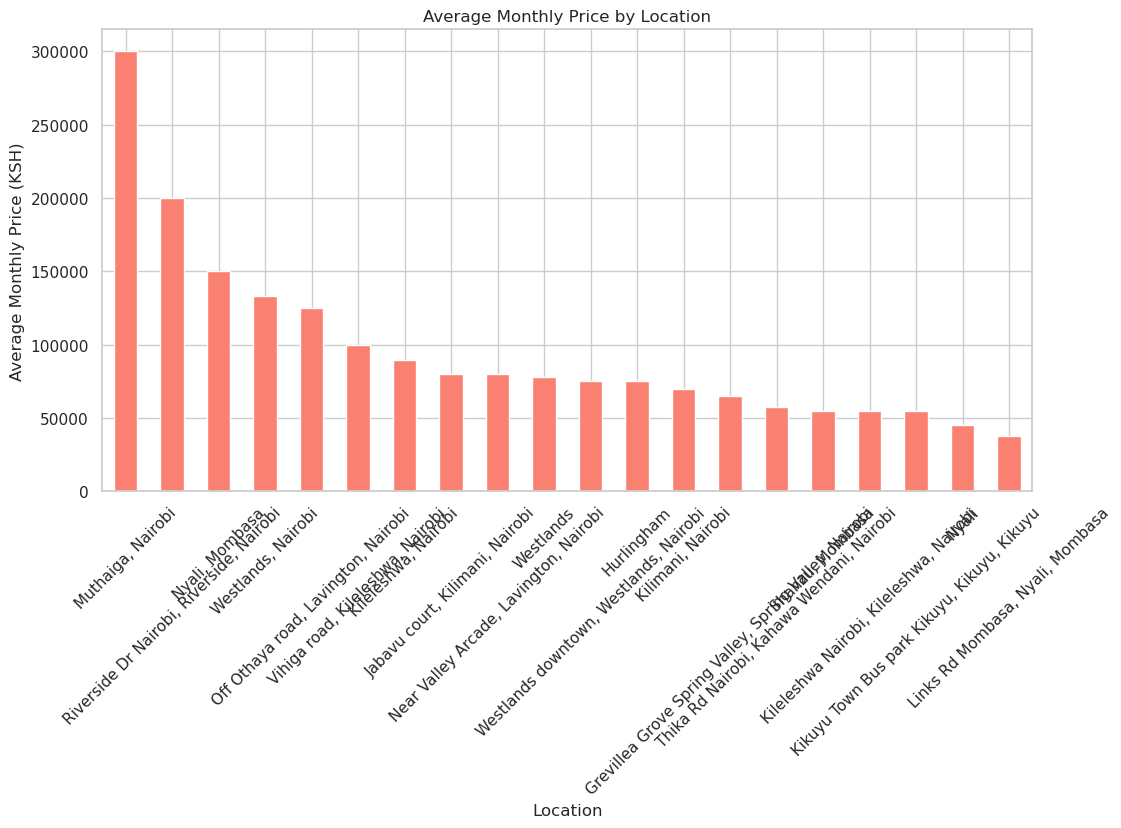

In [42]:
# Average price by location
avg_price_location = df.groupby('location')['monthly_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_price_location.plot(kind='bar', color='salmon')
plt.title('Average Monthly Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Monthly Price (KSH)')
plt.xticks(rotation=45)
plt.show()

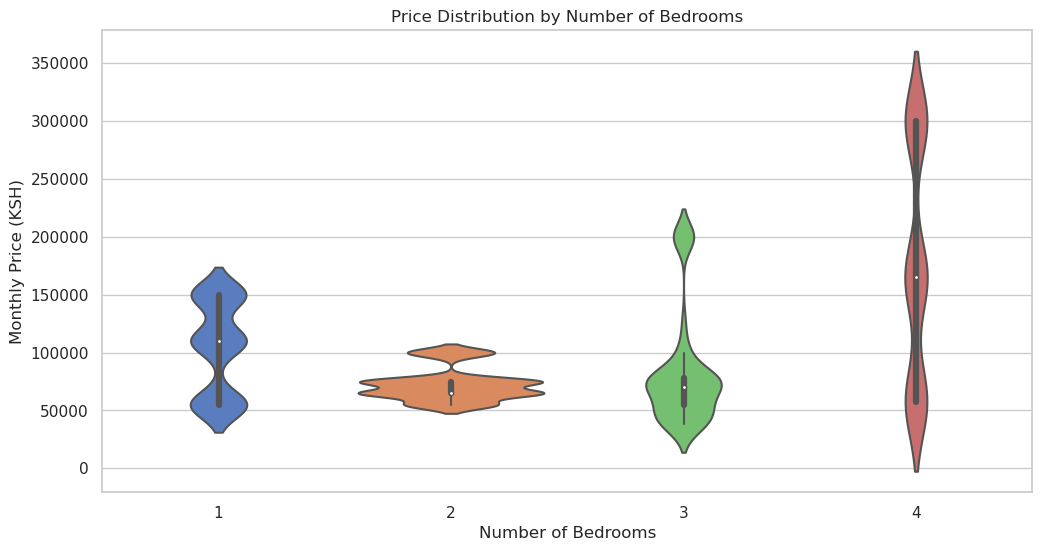

In [43]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='bedrooms', y='monthly_price', data=df, palette='muted')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Monthly Price (KSH)')
plt.show()

## Feature Engineering

In [49]:
# Function to split 'location' into 'neighborhood' and 'city'
def split_location(df):
    # Check if 'location' column exists in the DataFrame
    if 'location' in df.columns:
        # Split 'location' into two parts
        df[['neighborhood', 'city']] = df['location'].str.split(',', expand=True, n=1)
        
        # Strip any leading or trailing whitespace from new columns
        df['neighborhood'] = df['neighborhood'].str.strip()

        # Keep only the last name for the city column
        df['city'] = df['city'].str.split().str[-1].str.strip()
        
        return df
    else:
        raise ValueError("The DataFrame does not contain a 'location' column.")


# Calling the function
df = split_location(df)  # Call the function to split location


In [50]:
df

,title,location,bedrooms,bathrooms,price,rate,monthly_price,neighborhood,city
0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200000,Per Month,200000,Riverside Dr Nairobi,Nairobi
1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70000,Per Month,70000,Kileleshwa,Nairobi
2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38000,Per Month,38000,Links Rd Mombasa,Mombasa
3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80000,Per Month,80000,Near Valley Arcade,Nairobi
4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110000,Per Month,110000,Kileleshwa,Nairobi
...,...,...,...,...,...,...,...,...,...
2515,3 Bedroom Apartment / Flat to rent in Kilimani,"Kilimani, Nairobi",3,3,75000,Per Month,75000,Kilimani,Nairobi
2516,3 Bedroom Apartment / Flat to rent in Nyali,Nyali,3,2,45000,Per Month,45000,Nyali,None
2517,2 Bedroom Apartment / Flat to rent in Spring V...,"Grevillea Grove Spring Valley, Spring Valley, ...",2,3,65000,Per Month,65000,Grevillea Grove Spring Valley,Nairobi
2518,4 Bedroom Apartment / Flat to rent in Muthaiga,"Muthaiga, Nairobi",4,5,300000,Per Month,300000,Muthaiga,Nairobi


In [51]:
# Function to one-hot encode the 'city' column
def one_hot_encode_city(df):
    # Check if 'city' column exists in the DataFrame
    if 'city' in df.columns:
        # One-hot encode the 'city' column, dropping the first category
        df = pd.get_dummies(df, columns=['city'], drop_first=True)
        return df
    else:
        raise ValueError("The DataFrame does not contain a 'city' column.")

# Call the function to one-hot encode the city
df = one_hot_encode_city(df)  

In [52]:
df

,title,location,bedrooms,bathrooms,price,rate,monthly_price,neighborhood,city_Mombasa,city_Nairobi
0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200000,Per Month,200000,Riverside Dr Nairobi,False,True
1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70000,Per Month,70000,Kileleshwa,False,True
2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38000,Per Month,38000,Links Rd Mombasa,True,False
3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80000,Per Month,80000,Near Valley Arcade,False,True
4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110000,Per Month,110000,Kileleshwa,False,True
...,...,...,...,...,...,...,...,...,...,...
2515,3 Bedroom Apartment / Flat to rent in Kilimani,"Kilimani, Nairobi",3,3,75000,Per Month,75000,Kilimani,False,True
2516,3 Bedroom Apartment / Flat to rent in Nyali,Nyali,3,2,45000,Per Month,45000,Nyali,False,False
2517,2 Bedroom Apartment / Flat to rent in Spring V...,"Grevillea Grove Spring Valley, Spring Valley, ...",2,3,65000,Per Month,65000,Grevillea Grove Spring Valley,False,True
2518,4 Bedroom Apartment / Flat to rent in Muthaiga,"Muthaiga, Nairobi",4,5,300000,Per Month,300000,Muthaiga,False,True


## Modelling

In [54]:
# Define your features (X) and target (y)
X = df[['bedrooms', 'bathrooms', 'city_Nairobi', 'city_Mombasa']]  # Example of using encoded features
y = df['price']

In [55]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Training multiple models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        results[name] = rmse
        print(f"{name} RMSE: {rmse:.2f}")
    return results

In [64]:
# Dictionary containing the models to train
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf'),
    'Neural Network': MLPRegressor(random_state=42)
}

In [65]:
# Training and Evaluating the models
results = train_and_evaluate(models, X_train, y_train, X_test, y_test)

Linear Regression RMSE: 48315.68
Decision Tree RMSE: 28731.52
Random Forest RMSE: 28726.66
Gradient Boosting RMSE: 28750.32
XGBoost RMSE: 28731.52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 4
[LightGBM] [Info] Start training from score 88946.676587
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/home/troye/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


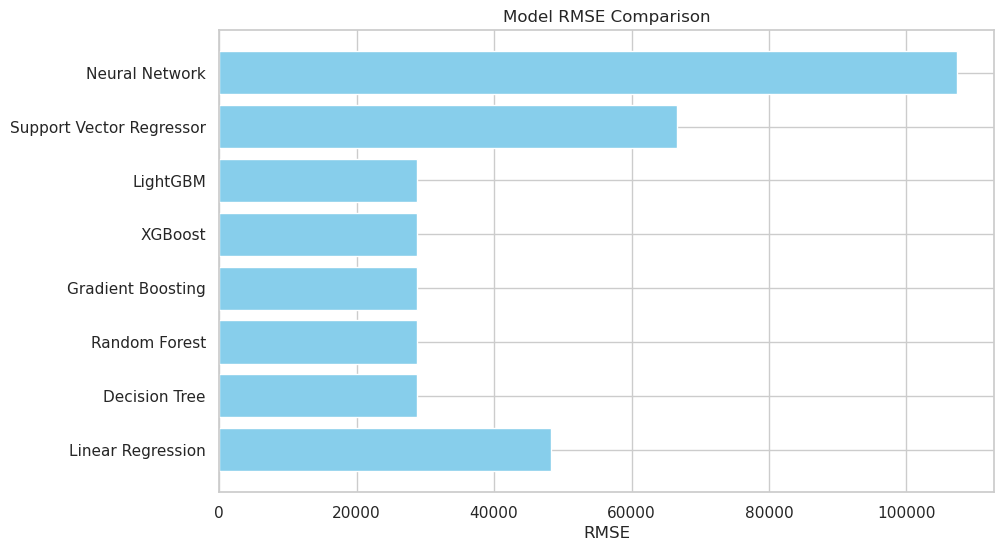

In [66]:
# Plotting RMSE results
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('RMSE')
plt.title('Model RMSE Comparison')
plt.show()


## Hyperparameter Tuning

a) GridSearchCV

In [68]:
# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Gradient Boosting hyperparameters
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}


In [69]:
# Setting up the models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV instances
rf_grid_search = GridSearchCV(estimator=rf_model, 
                               param_grid=rf_param_grid, 
                               scoring='neg_root_mean_squared_error', 
                               cv=5,
                               verbose=2,
                               n_jobs=-1)

gb_grid_search = GridSearchCV(estimator=gb_model, 
                               param_grid=gb_param_grid, 
                               scoring='neg_root_mean_squared_error', 
                               cv=5,
                               verbose=2,
                               n_jobs=-1)

In [70]:
# Fit Random Forest Grid Search
rf_grid_search.fit(X_train, y_train)

# Fit Gradient Boosting Grid Search
gb_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [71]:
# Best parameters and score for Random Forest
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best RMSE for Random Forest:", -rf_grid_search.best_score_)

# Best parameters and score for Gradient Boosting
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best RMSE for Gradient Boosting:", -gb_grid_search.best_score_)


Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE for Random Forest: 29818.967403751576
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best RMSE for Gradient Boosting: 29815.79973529939


b) RandomizedSearchCV

In [72]:
# Create RandomizedSearchCV instances
rf_random_search = RandomizedSearchCV(estimator=rf_model, 
                                       param_distributions=rf_param_grid, 
                                       scoring='neg_root_mean_squared_error', 
                                       n_iter=100,  # number of different combinations to try
                                       cv=5,
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)

gb_random_search = RandomizedSearchCV(estimator=gb_model, 
                                       param_distributions=gb_param_grid, 
                                       scoring='neg_root_mean_squared_error', 
                                       n_iter=100,
                                       cv=5,
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)

# Fit the Randomized Search models
rf_random_search.fit(X_train, y_train)
gb_random_search.fit(X_train, y_train)

# Get best parameters and scores for Random Forest
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best RMSE for Random Forest:", -rf_random_search.best_score_)

# Get best parameters and scores for Gradient Boosting
print("Best parameters for Gradient Boosting:", gb_random_search.best_params_)
print("Best RMSE for Gradient Boosting:", -gb_random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2

## Saving the model

In [73]:
import joblib

# Assuming `gb_grid_search` is your GridSearchCV object for Gradient Boosting
best_model = gb_grid_search.best_estimator_

# Save the model to a file
joblib.dump(best_model, 'best_gradient_boosting_model.pkl')
print("Gradient Boosting model saved as best_gradient_boosting_model.pkl")

Gradient Boosting model saved as best_gradient_boosting_model.pkl
